# DS1000B Rigol Waveform Examples

**Scott Prahl**

**July 2021**

This notebook illustrates shows how to extract signals from a `.wfm` file created by a the Rigol DS1204B scope.  

*If RigolWFM is not installed, uncomment the following cell (i.e., delete the #) and run (shift-enter)*

In [1]:
#!pip install --user RigolWFM

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

try:
    import RigolWFM.wfm as rigol
except ModuleNotFoundError:
    print('RigolWFM not installed. To install, uncomment and run the cell above.')
    print('Once installation is successful, rerun this cell again.')

repo = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/"


A list of Rigol scopes in the DS1000B family is:

In [3]:
print(rigol.DS1000B_scopes[:])

['B', '1000B', 'DS1000B', 'DS1074B', 'DS1104B', 'DS1204B']


## DS1204B

We will start with a `.wfm` file from a Rigol DS1204B scope. 

<img src="../wfm/DS1204B.bmp" width="50%">



### Now for the `.wfm` data

First a textual description.

In [12]:
# raw=true is needed because this is a binary file
wfm_url = repo + "DS1204B.wfm?raw=true"  
w = rigol.Wfm.from_url(wfm_url, '1000B')

description = w.describe()
print(description)

downloading 'https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS1204B.wfm?raw=true'
    General:
        File Model   = wfm1000b
        User Model   = 1000B
        Parser Model = wfm1000b
        Firmware     = unknown
        Filename     = DS1204B.wfm
        Channels     = [1, 2, 3, 4]

     Channel 1:
         Coupling =  unknown
            Scale =     1.00  V/div
           Offset =    -2.52  V
            Probe =       1X
         Inverted =    False

        Time Base =    2.000 ms/div
           Offset =    0.000  s
            Delta =    8.000 µs/point
           Points =     8192

         Count    = [        1,        2,        3  ...      8191,     8192]
           Raw    = [       86,       86,       86  ...       163,      163]
           Times  = [-32.768 ms,-32.760 ms,-32.752 ms  ... 32.760 ms,32.768 ms]
           Volts  = [  3.04  V,  3.04  V,  3.04  V  ... -40.00 mV,-40.00 mV]

     Channel 2:
         Coupling =  unknown
            Scale =     5.00  V/div
 

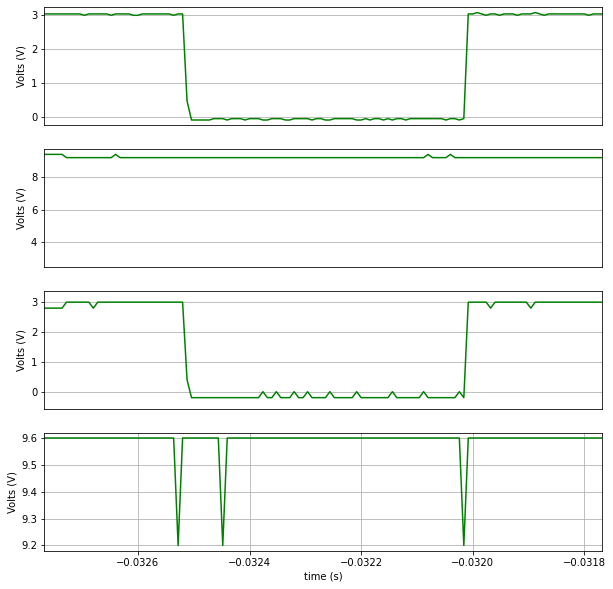

In [13]:
csv_file = "/Users/prahl/Documents/Code/git/RigolWFM/wfm/DS1204B.csv"

csv_data = np.genfromtxt(csv_file, delimiter=',', skip_header=2, encoding='latin1').T

plt.subplots(4,1,sharex=True,figsize=(10,10),subplot_kw=dict(frameon=False,xlim=(-0.001,0.001)))
plt.title("DS1204B from .csv file")

plt.subplot(411)
plt.plot(csv_data[0], csv_data[1], color='green')
plt.ylabel("Volts (V)")
plt.xlim(csv_data[0,0],csv_data[0,0]+0.001)
plt.xticks([])
plt.grid(True)

plt.subplot(412)
plt.plot(csv_data[0],csv_data[2], color='green')
plt.ylabel("Volts (V)")
plt.xlim(csv_data[0,0],csv_data[0,0]+0.001)
plt.xticks([])
plt.grid(True)

plt.subplot(413)
plt.plot(csv_data[0],csv_data[3], color='green')
plt.ylabel("Volts (V)")
plt.xlim(csv_data[0,0],csv_data[0,0]+0.001)
plt.xticks([])
plt.grid(True)

plt.subplot(414)
plt.plot(csv_data[0],csv_data[4], color='green')
plt.ylabel("Volts (V)")
plt.xlim(csv_data[0,0],csv_data[0,0]+0.001)
plt.xlabel("time (s)")
plt.grid(True)

#plt.xlim(center_time-0.6,center_time+0.6)

plt.show()

Plotting the .wfm results and the .csv values give us one single line.

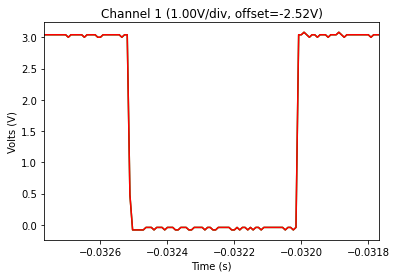

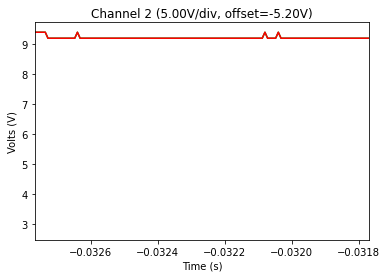

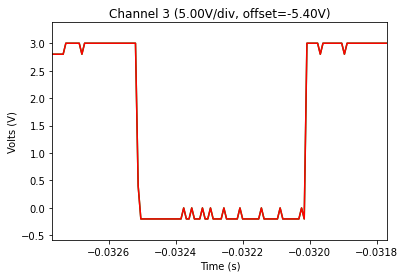

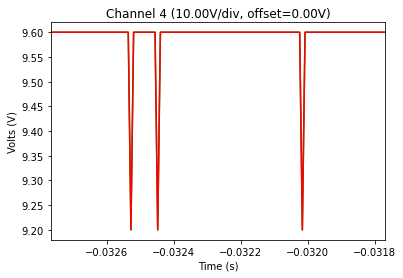

In [14]:

for i in range(4):

    ch = w.channels[i]
    start = ch.times[0]

    plt.plot(ch.times, ch.volts, color='green')
    plt.title("Channel %d (%.2fV/div, offset=%.2fV)"%(i+1,ch.volt_per_division,ch.volt_offset))
    plt.ylabel("Volts (V)")

    plt.plot(csv_data[0], csv_data[i+1], color='red')
    plt.xlabel("Time (s)")
    plt.ylabel("Volts (V)")
    plt.xlim(start,start+0.001)
    plt.show()


Differences are all essentially zero!

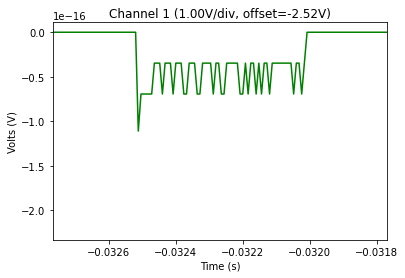

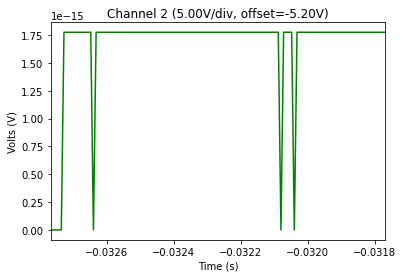

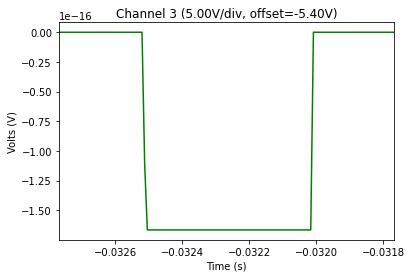

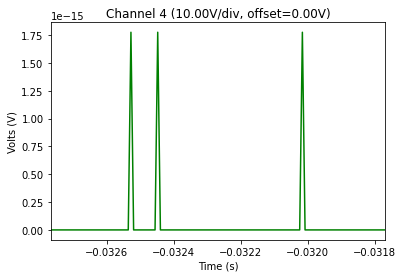

In [15]:

for i in range(4):
    ch = w.channels[i]
    start = ch.times[0]

    plt.plot(ch.times, ch.volts- csv_data[i+1], color='green')
    plt.title("Channel %d (%.2fV/div, offset=%.2fV)"%(i+1,ch.volt_per_division,ch.volt_offset))
    plt.ylabel("Volts (V)")

    plt.xlabel("Time (s)")
    plt.ylabel("Volts (V)")
    plt.xlim(start,start+0.001)
    plt.show()
